# 0.6 Train SVM model

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import os
import string
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [3]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [4]:
dataset = pd.read_csv("data/advanced_features_resized.csv")

In [5]:
dataset.drop(columns='inverse_difference_moments', inplace=True)

In [6]:
X = dataset.iloc[:, 2:]
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,4472.0,334.592926,75,88,0.852273,1.475850,25.034085,10.089100,11.984933,6.380822,21.173183,24.968681,13.686467,436.717643,0.964281,2.469426
1,8894.5,423.060962,125,121,1.033058,1.700489,20.122613,13.478222,15.898889,7.752678,25.079720,29.482512,14.721599,354.768604,0.972953,2.691074
2,4907.5,333.119837,84,91,0.923077,1.557616,22.612089,10.191067,11.994956,6.349422,22.887987,26.696621,14.417631,292.952568,0.971974,2.181731
3,9076.5,386.776691,98,132,0.742424,1.425219,16.481706,12.473111,14.668578,7.072744,24.291946,28.375439,13.941965,233.129250,0.981478,2.416769
4,305.5,74.183765,20,27,0.740741,1.767594,18.013850,15.719522,18.338144,9.900922,25.463076,29.466145,16.400346,359.828582,0.977311,3.345616


In [7]:
y = dataset.iloc[:,1]
y.head(5)

0    9
1    9
2    9
3    9
4    9
Name: label, dtype: int64

## Cross validational split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 142)

In [10]:
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
3465,9.5,20.242641,10,3,3.333333,3.157895,43.133105,1.812444,2.109711,0.840378,11.151465,12.862946,5.417647,175.678374,0.901600,0.451285
467,254.5,92.870057,35,18,1.944444,2.475442,33.889381,15.513533,18.108222,6.177678,31.587395,36.781941,13.588205,318.630034,0.966932,2.487244
963,18087.5,1401.692556,164,288,0.569444,2.611306,108.624300,12.348633,15.221656,4.546222,24.550706,30.061167,10.216678,366.750102,0.969832,2.594271
1471,257.5,135.580733,48,42,1.142857,7.829126,71.386933,4.514944,4.618278,2.242711,18.837252,19.093842,9.674580,439.488533,0.871623,0.957643
4116,1846.5,252.066015,109,29,3.758621,1.711887,34.409573,22.075256,25.983533,8.453156,35.178691,40.764338,15.297856,458.645313,0.965307,3.727928


In [11]:
y_train[0:5]

3465    11
467      0
963      8
1471    10
4116     4
Name: label, dtype: int64

In [12]:
from sklearn import preprocessing

In [13]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [14]:
X_train

array([[5.17635667e-02, 1.10298029e-01, 5.44879649e-02, ...,
        9.57235709e-01, 4.91263393e-03, 2.45896263e-03],
       [5.98572105e-01, 2.18426034e-01, 8.23183642e-02, ...,
        7.49402948e-01, 2.27417892e-03, 5.84988163e-03],
       [9.96619897e-01, 7.72331550e-02, 9.03638773e-03, ...,
        2.02079032e-02, 5.34376561e-05, 1.42944158e-04],
       ...,
       [6.75303048e-01, 3.22253683e-01, 1.43973239e-01, ...,
        6.24973436e-01, 2.15318112e-03, 2.32294919e-03],
       [7.76832398e-01, 3.60712671e-01, 1.79729861e-02, ...,
        4.40415402e-01, 1.94653178e-03, 4.78239805e-03],
       [8.76806563e-01, 1.05741465e-01, 2.53229332e-02, ...,
        4.65488903e-01, 6.68999070e-04, 2.26418519e-03]])

In [15]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train[0:2]

array([[-1.62411703,  0.29790911,  1.02843219, -0.29593812,  3.81567638,
         1.32251988,  2.05063637, -0.08892909, -0.07849042, -0.05054924,
         0.86116784,  0.91425957,  0.89759914,  1.50741752,  1.78604464,
         0.10854465],
       [-0.29049229,  1.62152248,  2.01573917,  0.66728078,  0.62960492,
         0.17592516,  0.39249561,  1.17498214,  1.23179792,  1.17097536,
         1.21022884,  1.29405162,  1.03261556,  1.00644081,  0.49411019,
         1.1159037 ]])

In [17]:
y_train[0:2]

3465    11
467      0
Name: label, dtype: int64

In [18]:
X_train.std()

1.0

In [19]:
X_test.mean()

-0.033357174082804815

## Applying SVM classifier model

In [20]:
from sklearn import svm

In [21]:
clf = svm.SVC(kernel='rbf', C=1000, decision_function_shape='ovo', gamma=2)
clf.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn import metrics

In [24]:
metrics.accuracy_score(y_test, y_pred)

0.6685393258426966

In [25]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       128
           1       0.76      0.72      0.74       138
           2       0.65      0.73      0.69       148
           3       0.81      0.76      0.78       115
           4       0.79      0.70      0.74       144
           5       0.77      0.37      0.50        62
           6       0.59      0.60      0.59        67
           7       0.58      0.32      0.41        60
           8       0.93      0.78      0.85       190
           9       0.85      0.72      0.78        89
          10       0.46      0.81      0.59       212
          11       0.31      0.15      0.21        71

   micro avg       0.67      0.67      0.67      1424
   macro avg       0.68      0.61      0.63      1424
weighted avg       0.69      0.67      0.67      1424



In [26]:
def gridSearch(DataSet, LabelSet):
    #define logspace/interval from which c and gamma valuest are computed and saved to a dictionary to be passed as a parameter
    #c from 1e-2 to 1e10
    C_range = np.logspace(-2, 10, 13)
    #gamma from 1e-9 to 1e3
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, n_jobs=1)
    grid.fit(DataSet, LabelSet)
    
    return grid.best_score_

In [27]:
import pickle

In [28]:
# save the classifier
with open('/Users/anacriel/plant_seed_classification/models/svm_clf_classifier_resized_1.pkl', 'wb') as fid:
    pickle.dump(clf, fid) 

## Checking test images

In [29]:
def get_features(images, titles):
    features_names = ['title', 'area', 'perimeter', 'physiological_length', \
                      'physiological_width', 'aspect_ratio', 'rectangularity', 'circularity', \
                      'mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g','stddev_b', \
                      'contrast','correlation', 'entropy']
    df = pd.DataFrame([], columns=features_names)
    for i in range(len(images)):
        #Delete background
        mask = vs.create_mask_for_plant(images[i])
        seg_image = cv2.bitwise_and(images[i], images[i], mask=mask)
        seg_image = vs.sharpen_image(seg_image)
        seg_image[mask == 0] = 255
            
        #Preprocessing
        img = cv2.cvtColor(seg_image, cv2.COLOR_BGR2RGB)
        gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret_otsu, im_bw_otsu = cv2.threshold(gs, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        kernel = np.ones((5, 5), np.uint8)
        closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
        #Shape features
        contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #if not contours:
        #    continue
        cnt = contours[0]
        M = cv2.moments(cnt)
        area = cv2.contourArea(cnt)
        perimeter = cv2.arcLength(cnt, True)
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = 0.0 if h == 0.0 else float(w) / h
        rectangularity = 0.0 if area == 0.0 else  w * h / area
        circularity = 0.0 if area == 0.0 else ((perimeter) ** 2) / area
        
        #Color features
        red_channel = img[:,:,0]
        green_channel = img[:,:,1]
        blue_channel = img[:,:,2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0
        
        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)
        
        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)
        
        #Texture features
        textures = mt.features.haralick(gs)
        ht_mean = textures.mean(axis=0)
        contrast = ht_mean[1]
        correlation = ht_mean[2]
        entropy = ht_mean[8]
        
        vector = [titles[i], area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
                  red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
                  contrast,correlation,entropy]
        
        df_temp = pd.DataFrame([vector],columns=features_names)
        df = df.append(df_temp)
    return df

In [30]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [31]:
import src.visualization.visualize as vs
import src.features.build_features as bfeatures
import cv2
import mahotas as mt
from matplotlib import pyplot as plt

In [32]:
data_dir = '../data/processed/'
test_image_dir = os.path.join(data_dir, 'test')

In [33]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [34]:
images, titles = vs.read_images(test_image_dir, data_type='test')

794


In [35]:
features_of_img = get_features(images, titles)

In [36]:
features_of_img.drop(columns='title', inplace=True)

In [37]:
features_of_img

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,10474.5,901.678273,194,176,1.102273,3.259726,77.619333,18.830475,22.201450,7.898525,31.369592,36.724657,14.204939,509.372473,0.961786,3.458075
0,603.5,352.492421,119,62,1.919355,12.225352,205.883856,3.328175,3.616725,1.880675,15.762264,17.012812,9.103054,461.932031,0.829756,0.770849
0,10116.5,497.830514,183,95,1.926316,1.718480,24.498119,18.226950,21.961450,7.969200,31.222592,37.552700,14.521376,299.963819,0.976138,3.342835
0,5945.5,514.541192,136,187,0.727273,4.277521,44.529920,11.130650,13.210050,5.628075,26.387218,31.155451,14.095701,282.822166,0.966349,2.088232
0,16972.0,743.695518,187,191,0.979058,2.104466,32.587970,25.011775,30.901000,14.131375,30.291546,37.124057,19.356647,515.979244,0.970758,4.956965
0,720.5,353.605118,138,66,2.090909,12.641221,173.541401,3.480950,3.741650,2.124400,16.071328,17.162953,9.876602,339.487626,0.877149,0.747992
0,15032.5,500.516807,189,110,1.718182,1.383003,16.665031,26.133650,30.400400,10.312250,33.912429,39.123497,14.749536,252.903182,0.984358,4.375090
0,1492.0,320.735061,96,50,1.920000,3.217158,68.948377,14.360250,15.886400,6.529300,30.586925,33.803280,14.999638,717.462790,0.925766,2.713894
0,7559.5,645.511751,156,187,0.834225,3.858985,55.120765,14.725600,16.812050,4.185125,30.239339,34.326109,10.436915,352.779243,0.965615,2.585454
0,50.0,46.284271,12,19,0.631579,4.560000,42.844674,1.088325,1.123125,0.605400,9.623384,9.890132,5.371517,163.677042,0.783275,0.243768


In [38]:
features_of_img = preprocessing.normalize(features_of_img)

In [39]:
scaler = preprocessing.StandardScaler()
features_of_img = scaler.fit_transform(features_of_img)

In [40]:
y_test_pred = clf.predict(features_of_img)

In [41]:
y_test_pred[0]

0

In [42]:
cols = {'file':titles, 'species':y_test_pred}

In [43]:
submission_df = pd.DataFrame(data=cols)

In [44]:
submission_df.iloc[520]

file       e721c6ac8.png
species               10
Name: 520, dtype: object

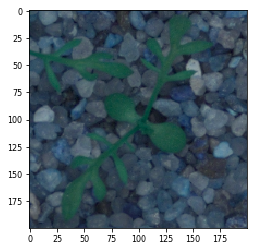

In [50]:
plt.imshow(images[7])

In [46]:
submission_df

,file,species
0,1b490196c.png,0
1,85431c075.png,10
2,506347cfe.png,3
3,7f46a71db.png,5
4,668c1007c.png,3
5,71f5323c5.png,10
6,1f3f44563.png,0
7,beebe5f4e.png,2
8,780defa2e.png,5
9,df521c0c0.png,10


In [51]:
submission_df.to_csv("data/3nd_submission.csv")

In [52]:
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }

In [53]:
mapping_rev = {v : k for k, v in mapping.items()}

In [54]:
mapping_rev

{0: 'Sugar beet',
 1: 'Fat Hen',
 2: 'Scentless Mayweed',
 3: 'Charlock',
 4: 'Small-flowered Cranesbill',
 5: 'Maize',
 6: 'Shepherds Purse',
 7: 'Common wheat',
 8: 'Common Chickweed',
 9: 'Cleavers',
 10: 'Loose Silky-bent',
 11: 'Black-grass'}

In [55]:
submission_df.species.replace(mapping_rev, inplace=True); submission_df

,file,species
0,1b490196c.png,Sugar beet
1,85431c075.png,Loose Silky-bent
2,506347cfe.png,Charlock
3,7f46a71db.png,Maize
4,668c1007c.png,Charlock
5,71f5323c5.png,Loose Silky-bent
6,1f3f44563.png,Sugar beet
7,beebe5f4e.png,Scentless Mayweed
8,780defa2e.png,Maize
9,df521c0c0.png,Loose Silky-bent


In [57]:
submission_df.to_csv("/Users/anacriel/submission.csv", index=False)